In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

df = pd.read_excel(r"D:\Hands on Stat\eai (1).xlsx")
df.head()

,Manager,Annual Salary,Training Program
0,1,75769.5,No
1,2,70823.0,Yes
2,3,68408.2,No
3,4,69787.5,No
4,5,72801.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manager           2500 non-null   int64  
 1   Annual Salary     2500 non-null   float64
 2   Training Program  2500 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB


In [24]:
random.seed(42)
sample_size = 50
random_sample = df.sample(n=sample_size)
random_sample.head()

,Manager,Annual Salary,Training Program
1166,1167,76815.1,No
2371,2372,70481.0,No
482,483,73043.4,Yes
708,709,77948.9,Yes
2141,2142,81095.0,No


In [5]:
### Interpretation

#The sample represents a simple random sample of managers selected
#from a finite population. Each manager had an equal probability of
#being included, and no manager appears more than once.

In [6]:
import random
random.seed(42)
sample_size = 10
random_sample = df.sample(n=sample_size, replace=True)
print(random_sample)

      Manager  Annual Salary Training Program
1613     1614        65483.2              Yes
1251     1252        69269.8              Yes
1190     1191        73862.7              Yes
58         59        65433.4              Yes
192       193        77737.2               No
108       109        74594.7               No
1953     1954        67368.5              Yes
1087     1088        69175.5               No
1744     1745        69199.5               No
70         71        71384.1              Yes


In [7]:
## Random Sampling (Infinite Population)

#Sampling with replacement allows the same observation to be selected
#multiple times. This approach is commonly used in simulations and
#bootstrapping methods.

In [8]:
point_estimate_mean = df['Annual Salary'].mean()
point_estimate_mean

71800.0

In [25]:
# Sample statistics
sample_data = random_sample['Annual Salary']
sample_mean = sample_data.mean()
sample_std = sample_data.std(ddof=1)
n = len(sample_data)

# Confidence level
confidence_level = 0.95

# Critical value from t-distribution
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

# Margin of error
margin_error = t_critical * (sample_std / np.sqrt(n))

# Confidence interval
lower_bound = sample_mean - margin_error
upper_bound = sample_mean + margin_error

lower_bound, upper_bound


(71135.72629059567, 73527.79770940433)

In [10]:
#95% confident that the true population mean lies between (68811.46820821936, 75517.47179178064)

In [26]:
num_samples = 1000
sample_size = 50
sample_means = []

for i in range(num_samples):
    sample = df.sample(n=sample_size, replace=True)
    sample_mean = sample['Annual Salary'].mean()
    sample_means.append(sample_mean)


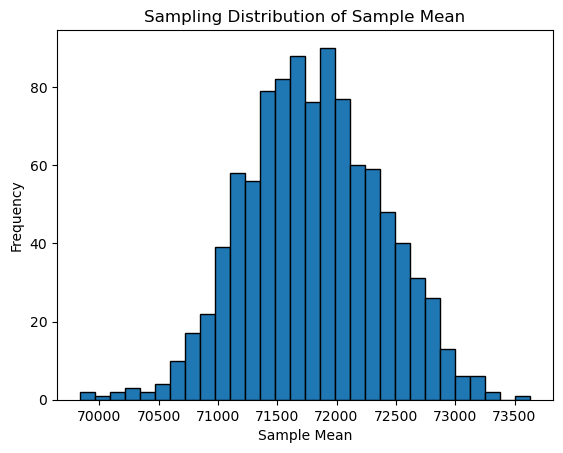

In [12]:
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("Sampling Distribution of Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [13]:
### Interpretation

#The histogram of sample means demonstrates the Central Limit Theorem.
#Despite the original population distribution, the sampling distribution
#of the sample mean is approximately normal for a sufficiently large
#sample size.

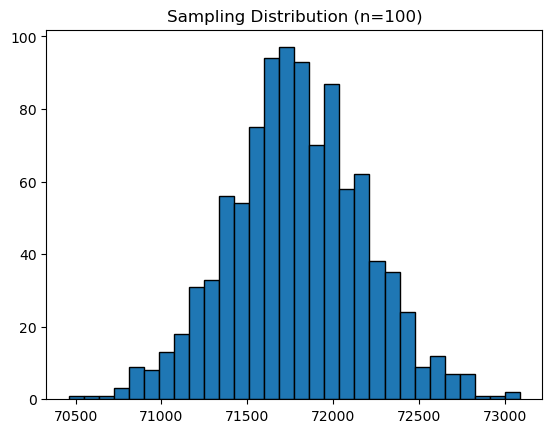

In [27]:
sample_size_large = 100
sample_means_large = []

for i in range(num_samples):
    sample = df.sample(n=sample_size_large, replace=True)
    sample_means_large.append(sample['Annual Salary'].mean())

plt.hist(sample_means_large, bins=30, edgecolor='black')
plt.title("Sampling Distribution (n=100)")
plt.show()

In [28]:
num_samples = 1000
sample_size = 30

sample_means = []

for i in range(num_samples):
    sample = df.sample(n=sample_size, replace=True)
    sample_means.append(sample['Annual Salary'].mean())

In [29]:
sample_means = np.array(sample_means)

standard_error = sample_means.std()

standard_error

744.6232457182473

In [17]:
sample_size_large = 100
sample_means_large = []

for i in range(num_samples):
    sample = df.sample(n=sample_size_large, replace=True)
    sample_means_large.append(sample['Annual Salary'].mean())

np.std(sample_means_large)

401.50782769887206

In [18]:
### Interpretation

#As sample size increases, the variability of the sample mean decreases,
#resulting in a smaller standard error. This demonstrates why larger
#samples produce more reliable estimates.

In [30]:
## Hypothesis Testing

#test whether the population mean salary is equal to 70,000.

# Hypothesized population mean
mu_0 = 70000

# one-sample t-test
t_statistic, p_value = stats.ttest_1samp(
    random_sample['Annual Salary'],
    mu_0
)

t_statistic, p_value


(3.9178187834013447, 0.0002769295800152979)

In [31]:
alpha = 0.05

if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

decision

'Reject the null hypothesis'

In [32]:
## Bootstrapping

#Bootstrapping is used to approximate the sampling distribution
#without relying on theoretical assumptions.

In [33]:
bootstrap_means = []

for _ in range(1000):
    bootstrap_sample = random_sample.sample(
        n=len(random_sample),
        replace=True
    )
    bootstrap_means.append(
        bootstrap_sample['Annual Salary'].mean()
    )

np.percentile(bootstrap_means, [2.5, 97.5])

array([71156.45015, 73459.979  ])